In [1]:
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
df=pd.read_excel("datas1.xlsx")

In [5]:
df.head()

,Unnamed: 0,rating,Reviews,sentiment
0,0,5,Very high quality and beautiful Amazon is more...,positive
1,1,5,The product is really excellent although it re...,positive
2,2,5,Price is a very good choice in terms of perfor...,positive
3,3,5,Thanks to Amazon Turkey before the product I g...,positive
4,4,5,I got it very quickly It was very well preserv...,positive


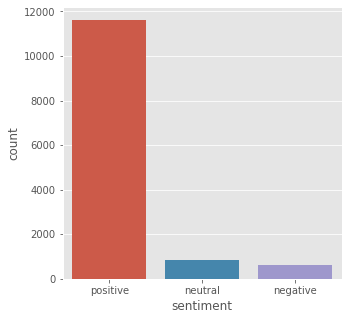

In [6]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

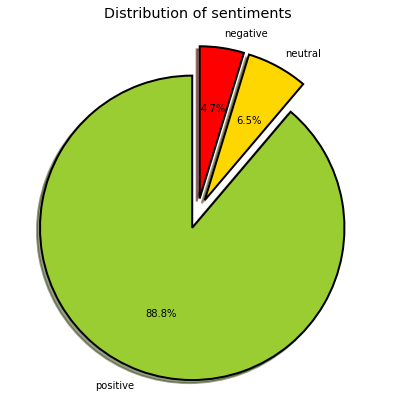

In [7]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [8]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['Reviews'].values.astype('U'))

In [9]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 132907

First 20 features:
 ['000', '000 phoneoh', '01', '01 day', '01 ie', '01 of', '01 the', '01 week', '0100', '0100 etc', '0100 gorilla', '0101', '0101 days', '0106', '0106 the', '0109', '0109 and', '010pra', '010pra vary', '0110']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
X = df['Reviews'].values.astype('U')
Y = df['sentiment']
X = vect.transform(X)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (10463, 132907)
Size of y_train: (10463,)
Size of x_test: (2616, 132907)
Size of y_test: (2616,)


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 94.76%


In [15]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  46   14   52]
 [   3  144   24]
 [  15   29 2289]]


              precision    recall  f1-score   support

    negative       0.72      0.41      0.52       112
     neutral       0.77      0.84      0.80       171
    positive       0.97      0.98      0.97      2333

    accuracy                           0.95      2616
   macro avg       0.82      0.74      0.77      2616
weighted avg       0.94      0.95      0.94      2616



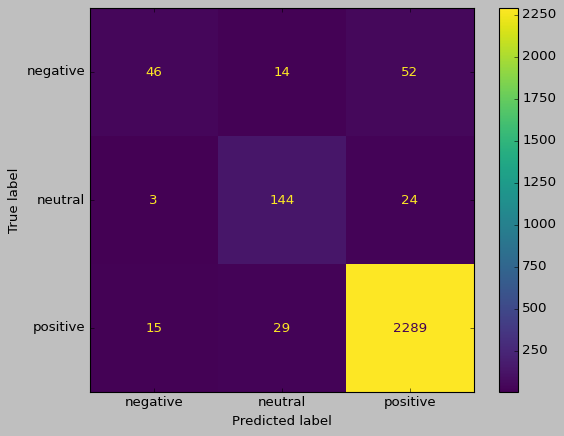

In [16]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [19]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [20]:
y_pred = grid.predict(x_test)

In [21]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 94.84%


In [22]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[  50   16   46]
 [   4  153   14]
 [  22   33 2278]]


              precision    recall  f1-score   support

    negative       0.66      0.45      0.53       112
     neutral       0.76      0.89      0.82       171
    positive       0.97      0.98      0.98      2333

    accuracy                           0.95      2616
   macro avg       0.80      0.77      0.78      2616
weighted avg       0.95      0.95      0.95      2616



In [23]:
from sklearn.svm import LinearSVC

In [24]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [25]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 94.88%


In [26]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[  49   22   41]
 [   6  159    6]
 [  20   39 2274]]


              precision    recall  f1-score   support

    negative       0.65      0.44      0.52       112
     neutral       0.72      0.93      0.81       171
    positive       0.98      0.97      0.98      2333

    accuracy                           0.95      2616
   macro avg       0.79      0.78      0.77      2616
weighted avg       0.95      0.95      0.95      2616



In [27]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [28]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [29]:
y_pred = grid.predict(x_test)

In [30]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 94.88%


In [31]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[  49   22   41]
 [   6  159    6]
 [  20   39 2274]]


              precision    recall  f1-score   support

    negative       0.65      0.44      0.52       112
     neutral       0.72      0.93      0.81       171
    positive       0.98      0.97      0.98      2333

    accuracy                           0.95      2616
   macro avg       0.79      0.78      0.77      2616
weighted avg       0.95      0.95      0.95      2616



In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred = classifier.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   2   44   66]
 [   0  138   33]
 [   7  228 2098]]


In [43]:
X = df['Reviews'].values.astype('U')
Y = df['sentiment']
X = vect.transform(X)
X = X.todense()

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [46]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()


classifier.fit(x_train, y_train)

GaussianNB()

In [48]:
y_pred = classifier.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[   7,    1,  104],
       [  11,   46,  114],
       [ 142,    4, 2187]])